First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Simple Random Sample (30 observations):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73                 6.1               2.8                4.7               1.2   
18                 5.7               3.8                1.7               0.3   
118                7.7               2.6                6.9               2.3   
78                 6.0               2.9           

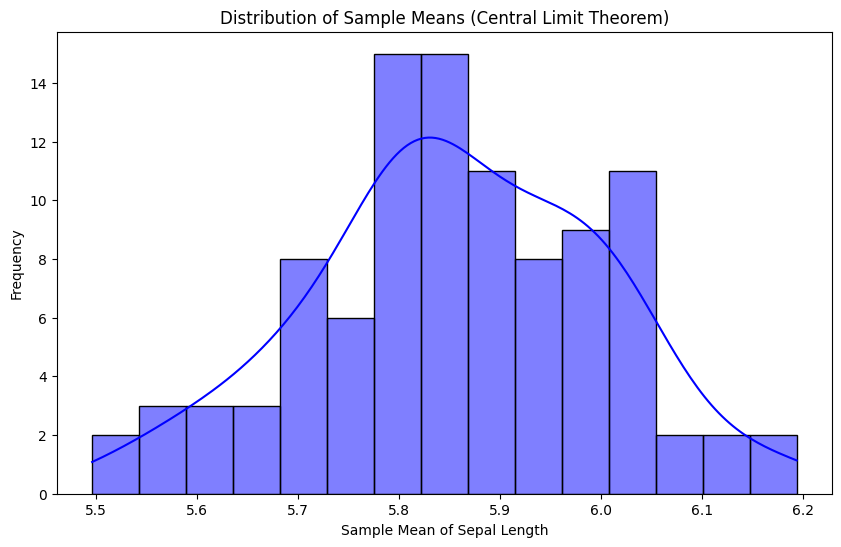

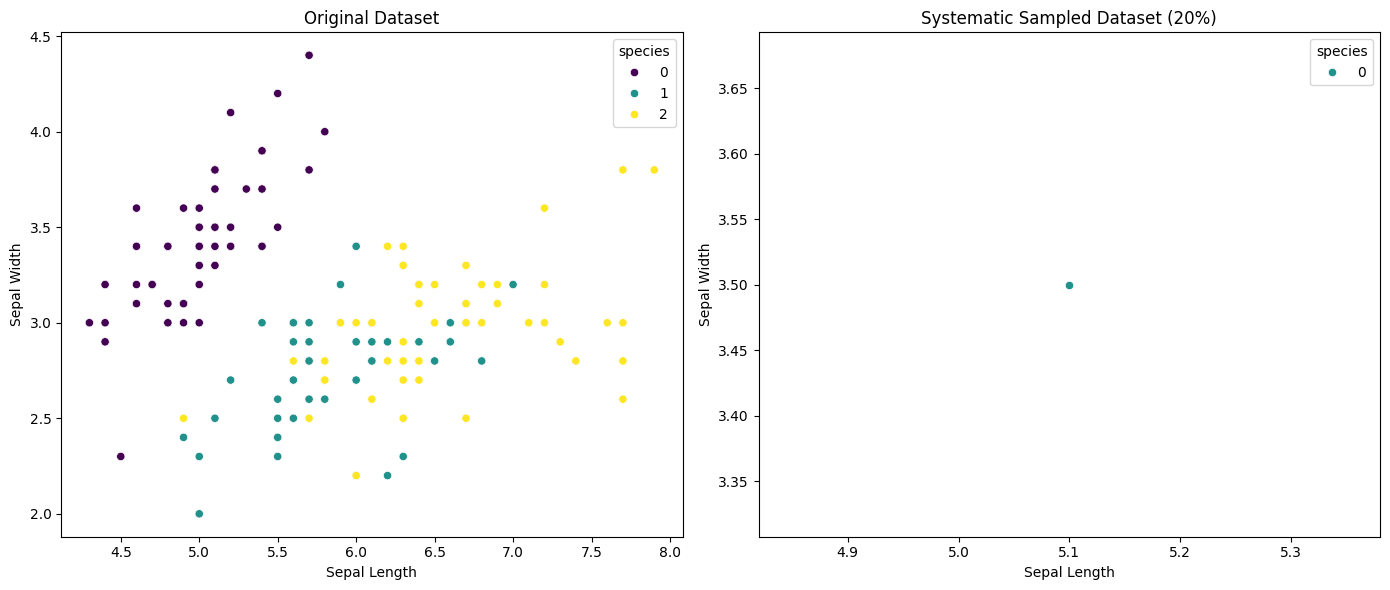

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add species column
print("First few rows of the dataset:")
print(df.head())

# Step 2: Simple Random Sampling (30 observations)
random_sample = df.sample(n=30, random_state=42)
print("\nSimple Random Sample (30 observations):")
print(random_sample)

# Step 3: Sample Mean Distribution Analysis (Central Limit Theorem)
sample_means = []
num_samples = 100

for _ in range(num_samples):
    sample = df.sample(n=30, random_state=np.random.randint(1000))
    sample_means.append(sample['sepal length (cm)'].mean())

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, bins=15, color='blue')
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample Mean of Sepal Length")
plt.ylabel("Frequency")
plt.show()

# Step 4: Systematic Sampling
def systematic_sampling(data, percentage):
    step = int(1 / percentage * len(data))
    indices = np.arange(0, len(data), step)
    return data.iloc[indices]

# Perform systematic sampling (20% of the dataset)
systematic_sample = systematic_sampling(df, percentage=0.2)

# Plot original vs sampled dataset
plt.figure(figsize=(14, 6))

# Plot original data
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title("Original Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Plot systematic sampled data
plt.subplot(1, 2, 2)
sns.scatterplot(data=systematic_sample, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title("Systematic Sampled Dataset (20%)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.tight_layout()
plt.show()